In [2]:
#let's import require librairie to work with....
import numpy as np 
import pandas as pd 
#import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns

In [3]:
#let's import our dataset......
data_path = ("/Users/sph-it/Desktop/AI/Service.csv")

In [4]:
#let's explorer our data...
read_data = pd.read_csv(data_path)
read_data.head()

/Users/sph-it/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unique Key,Created_date,Closing_date,Agency,Agency_name,Complaint_type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [25]:
read_data.shape

(300698, 53)

In [26]:
read_data.columns

Index(['Unique Key', 'Created_date', 'Closing_date', 'Agency', 'Agency_name',
       'Complaint_type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due_date',
       'Resolution Description', 'Resolution_action', 'Community Board',
       'Borough', 'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 

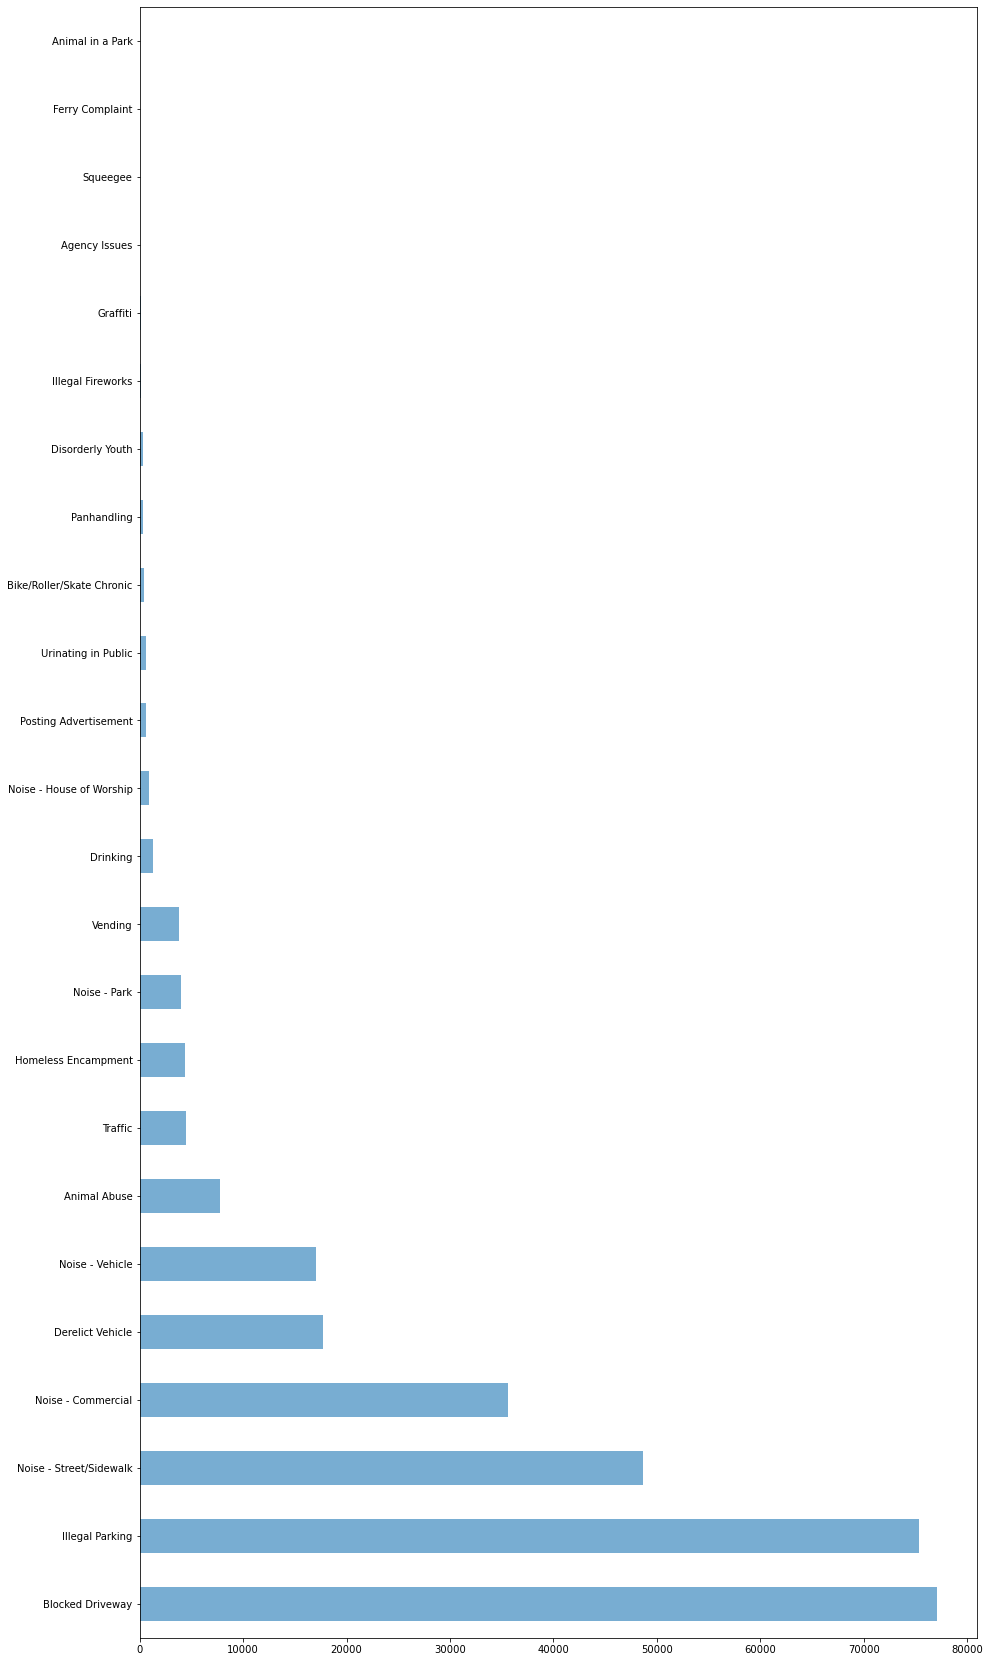

In [27]:
#Complaint type Breakdown with bar plot to figure out majority of complaint types and top 10 complaints
read_data['Complaint_type'].value_counts().plot(kind='barh',alpha=0.6,figsize=(15,30))
plt.show()

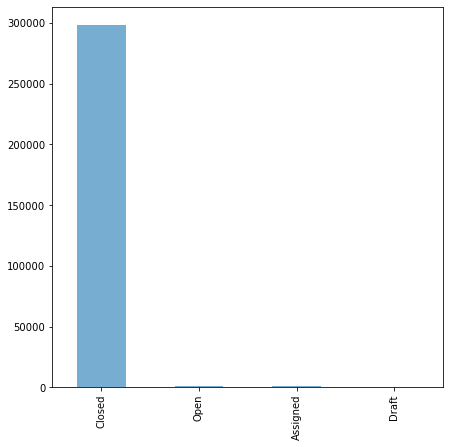

In [29]:
#Have a look at the status of tickets
read_data['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

In [51]:
#Group dataset by complaint type to display plot against city
groupedby_complaint = read_data.groupby('Complaint_type')
groupedby_complaint.size()

Complaint_type
Agency Issues                    6
Animal Abuse                  7778
Animal in a Park                 1
Bike/Roller/Skate Chronic      427
Blocked Driveway             77044
Derelict Vehicle             17718
Disorderly Youth               286
Drinking                      1280
Ferry Complaint                  2
Graffiti                       113
Homeless Encampment           4416
Illegal Fireworks              168
Illegal Parking              75361
Noise - Commercial           35577
Noise - House of Worship       931
Noise - Park                  4042
Noise - Street/Sidewalk      48612
Noise - Vehicle              17083
Panhandling                    307
Posting Advertisement          650
Squeegee                         4
Traffic                       4498
Urinating in Public            592
Vending                       3802
dtype: int64

In [56]:
grp_data = groupedby_complaint.get_group('Illegal Parking')
grp_data.shape

(75361, 53)

In [57]:
#To get nan values in the entire dataset
read_data.isnull().sum()

Unique Key                           0
Created_date                         0
Closing_date                      2164
Agency                               0
Agency_name                          0
Complaint_type                       0
Descriptor                        5914
Location Type                      131
Incident Zip                      2615
Incident Address                 44410
Street Name                      44410
Cross Street 1                   49279
Cross Street 2                   49779
Intersection Street 1           256840
Intersection Street 2           257336
Address Type                      2815
City                              2614
Landmark                        300349
Facility Type                     2171
Status                               0
Due_date                             3
Resolution Description               0
Resolution_action                 2187
Community Board                      0
Borough                              0
X Coordinate (State Plane

In [58]:
#fix blank values in City column
read_data['City'].dropna(inplace=True)

In [59]:
#Shape after dropping nan values
read_data['City'].shape

(298084,)

In [60]:
#count of null values in grouped city column data
read_data['City'].isnull().sum()

0

In [61]:
#fix those NAN with "unknown city" value instead
grp_data['City'].fillna('Unknown City', inplace =True)

/Users/sph-it/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


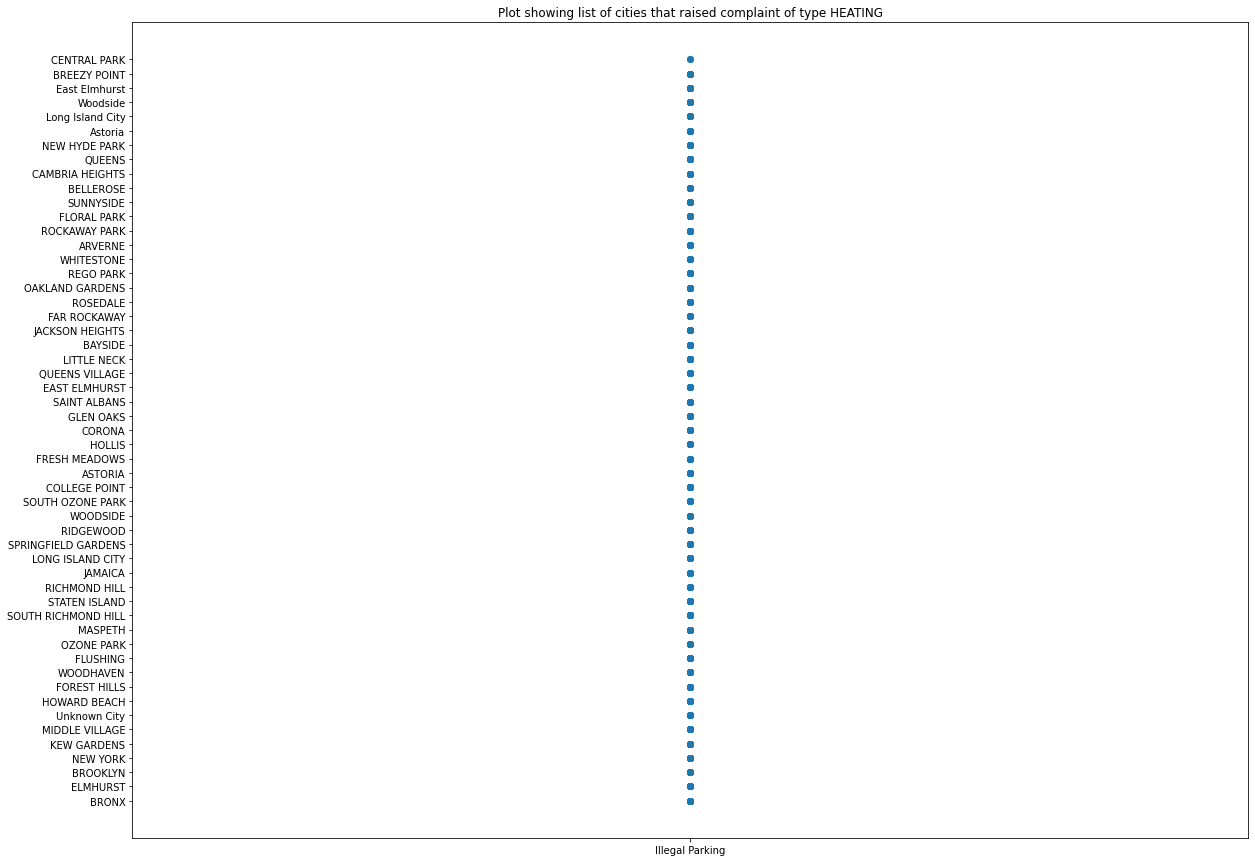

In [62]:
#Scatter plot displaying all the cities that raised complaint of type 'HEATING'
plt.figure(figsize=(20, 15))
plt.scatter(grp_data['Complaint_type'],grp_data['City'])
plt.title('Plot showing list of cities that raised complaint of type HEATING')
plt.show()

In [63]:
#Find top 10 major complaint types and their counts
groupedby_complaint['Complaint_type'].value_counts().nlargest(10)

Complaint_type           Complaint_type         
Blocked Driveway         Blocked Driveway           77044
Illegal Parking          Illegal Parking            75361
Noise - Street/Sidewalk  Noise - Street/Sidewalk    48612
Noise - Commercial       Noise - Commercial         35577
Derelict Vehicle         Derelict Vehicle           17718
Noise - Vehicle          Noise - Vehicle            17083
Animal Abuse             Animal Abuse                7778
Traffic                  Traffic                     4498
Homeless Encampment      Homeless Encampment         4416
Noise - Park             Noise - Park                4042
Name: Complaint_type, dtype: int64

In [64]:
#fix Location type those NAN with "unknown Location" value instead
read_data['Location Type'].fillna('Unknown Loc', inplace =True)

In [65]:
read_data['Location Type'].values

array(['Street/Sidewalk', 'Street/Sidewalk', 'Street/Sidewalk', ...,
       'Club/Bar/Restaurant', 'Club/Bar/Restaurant', 'Store/Commercial'],
      dtype=object)

In [66]:
#count of null values in grouped location type column data
grp_data['Location Type'].isnull().sum()

35

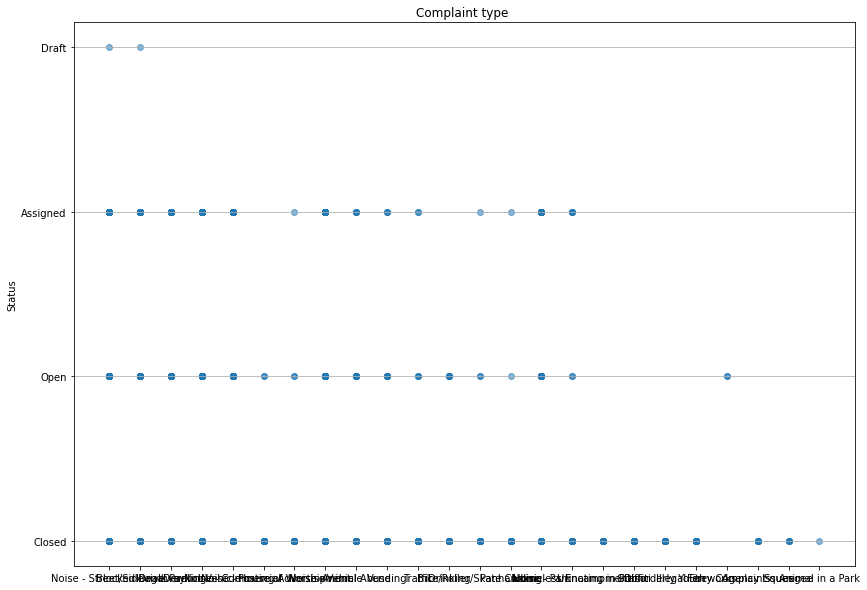

In [70]:
#Plot Major complaint type Heating against location type to check for any pattern
#plt.figure(figsize=(3, 3))
#plt.scatter(grp_data['Complaint_type'],grp_data['Location Type'])
#plt.title='Plot complaint type Heating against location type'
#plt.xlabel='Complaint Type'
#plt.ylabel='Location Type'
#plt.show()
#Plot below gives us a clear picture of the fact that all the complaints rasied of type "HEATING" in 2009 
#occured only in Residential Building! This shows that majority of complaints recorded was from Residential Building!
plt.figure(figsize=(14,10))
plt.scatter(read_data.Complaint_type,read_data.Status, alpha=.55)
plt.title("Complaint type ")
plt.ylabel("Status")
plt.grid(b=True, which='major',axis='y')
plt.show()